In [2]:
import numpy as np

In [17]:
class LogisticRegression:
    def __init__(self, epochs = 1000, learning_rate = 0.01):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.weights = None
        self.bias = None
        self.losses  = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        nsamples, nfeatures = X.shape
        self.weights = np.zeros(nfeatures)
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            dw = (1 / nsamples) * np.dot(X.T, (y_pred - y))
            db = (1 / nsamples) * np.sum(y_pred - y)

            loss = -np.mean(y * np.log(y_pred + 1e-9) + (1-y) * np.log(1 - y_pred+1e-9))
            self.losses.append(loss)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return [1 if i>0.5 else 0 for i in y_pred]

Predictions are: [1, 1, 0]


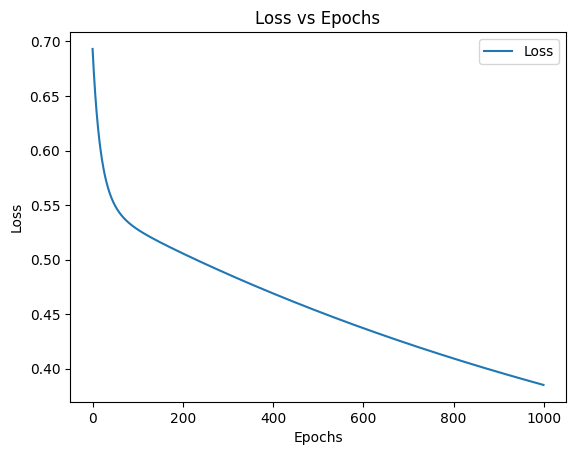

In [25]:
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([0,0,1,1,1])

model = LogisticRegression()
model.fit(X,y)

y_pred = model.predict([[4], [3.5], [1]])
print(f"Predictions are: {y_pred}")

import matplotlib.pyplot as plt
plt.plot(range(len(model.losses)), model.losses, label='Loss')  # ✅ Correct
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize weights and bias
        self.weights = numpy.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.n_iterations):
            linear_model = numpy.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * numpy.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * numpy.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = numpy.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]
        return numpy.array(y_predicted_class)

    def sigmoid(self, x):
        return 1 / (1 + numpy.exp(-x))      